# Part A:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spopt
import scipy.integrate as spint
import scipy.interpolate as spinterp

### Exercise 1: 

Firstly the data of pulsar-timing.txt are being read,which contains the number and the date (in years) of observations,the phase residual (years) and its error (years) of the binary pulsar PSR~1913+16.Below the scatter plot of the measurement time from the first date and the phase residual.For the next parts of the exercise I assume that the errors are normally distributed.

Text(0, 0.5, 'orbit phase residual [years]')

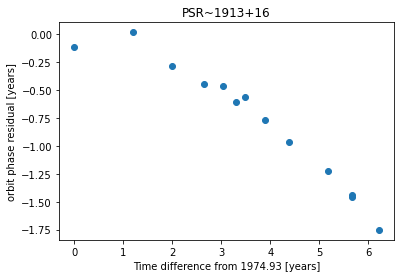

In [15]:
pulsar = np.genfromtxt('pulsar-timing.txt', dtype='float', usecols=(1,2,3), names=True)
plt.scatter(pulsar["date"]-pulsar["date"][0],pulsar["dt"])
plt.title("PSR~1913+16")
plt.xlabel("Time difference from "+str(pulsar["date"][0])+" [years]")
plt.ylabel("orbit phase residual [years]")

As we can see in the above plot obviously a good approximation would be a quadratic function,but we test more functions.Below three possible approximation of the relation of the data shown in the scatter plot above:

1)constant: y=$c_{0}$:constant    fun_1() 

2)linear function: $y=c_{0}+c_{1} \cdot x$:   fun_2()

3)quadratic function: $y=c_{0}+c_{1} \cdot x + c_{2} \cdot x^{2}$:   fun_3()

In [16]:
def fun_1(x,*par):
    return par

def fun_2(x,*par):
    return par[1]*x+par[0]

def fun_3(x,*par):
    return par[2]*x**2+par[1]*x+par[0]
    

Below a function that uses fitting is presented by the scipy function curve_fit() for the relation between residuals and time.The assumed function is given by the function's argument function and the parameters values are shown with their errors.Additionaly,a parameter for how good the fit is is also printed.Finally,the plot of the data and the fit function are presented in the same plot with their residuals.

In [17]:
def fiting(function,pulsar,p0):
    ml_cfpars, ml_cfcovar = spopt.curve_fit(function,pulsar["date"]-pulsar["date"][0],pulsar["dt"],p0,
                                            sigma=pulsar["error"])
    print("The covariance matrix is: ",ml_cfcovar)
    err = np.sqrt(np.diag(ml_cfcovar))
    n=0
    for i in p0:
        print("c"+str(n)+" =" + str(ml_cfpars[n]) + " +/- " + str(err[n]))
        n+=1
        
    minchisq = np.sum(((pulsar["dt"]-function(pulsar["date"]-pulsar["date"][0],
                                                     *ml_cfpars))/pulsar["error"])**2)

    dof = len(pulsar["date"])-len(p0)
    print("Minimum Chi-squared = "+str(minchisq)+" for "+str(dof)+" d.o.f.")
    print("The goodness of fit is: ",sps.chi2.sf(minchisq,df=dof))
    
    model_ens = np.linspace(0,6,1000)

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.errorbar(pulsar["date"]-pulsar["date"][0],pulsar["dt"], yerr=pulsar["error"], marker="o", linestyle="")
    if len(ml_cfpars)>1:
        ax1.plot(model_ens, function(model_ens,*ml_cfpars), lw=2)
    else:
        y=np.ones(len(model_ens))*ml_cfpars
        ax1.plot(model_ens, y, lw=2)
        
    ax1.set_title("PSR~1913+16")
    ax1.set_ylabel("phase residual [years]", fontsize=12)
    ax1.tick_params(labelsize=14)
    ax2.errorbar(pulsar["date"]-pulsar["date"][0],
                 pulsar["dt"]-function(pulsar["date"]-pulsar["date"][0],*ml_cfpars),
                 yerr=pulsar["error"],marker="o", linestyle="")
    ax2.set_xlabel("Years from "+str(pulsar["date"][0]),fontsize=12)
    ax2.set_ylabel("Residuals [years]", fontsize=12)
    ax2.axhline(0.0, color='r', linestyle='dotted', lw=2)
    ax2.tick_params(labelsize=14)
    plt.show()

    return ml_cfpars , err


The covariance matrix is:  [[0.02279659]]
c0 =-1.0839256192939697 +/- 0.1509853898938411
Minimum Chi-squared = 3548.1567279428273 for 12 d.o.f.
The goodness of fit is:  0.0


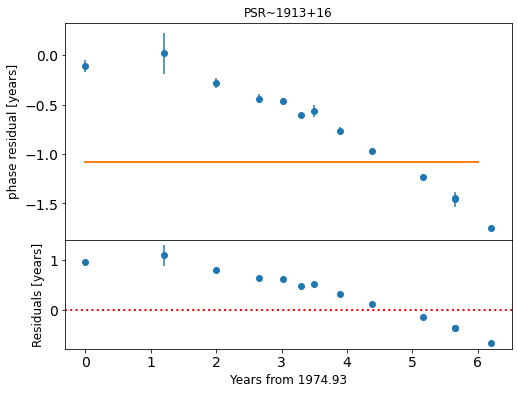

The covariance matrix is:  [[ 0.01261715 -0.00250692]
 [-0.00250692  0.00055088]]
c0 =0.48331980124103713 +/- 0.11232607205042994
c1 =-0.34439324516964037 +/- 0.0234708442326758
Minimum Chi-squared = 172.46601027174546 for 11 d.o.f.
The goodness of fit is:  3.6656133365177236e-31


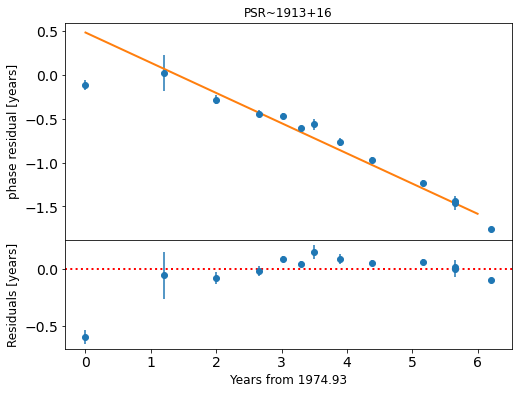

The covariance matrix is:  [[ 3.07323160e-03 -1.44919189e-03  1.57297329e-04]
 [-1.44919189e-03  7.73750113e-04 -9.04638145e-05]
 [ 1.57297329e-04 -9.04638145e-05  1.11065666e-05]]
c0 =-0.10268728691322525 +/- 0.05543673509476813
c1 =-0.007372762136798852 +/- 0.027816364120815378
c2 =-0.04137720150777441 +/- 0.0033326515940083545
Minimum Chi-squared = 10.506631570453585 for 10 d.o.f.
The goodness of fit is:  0.39722313357200567


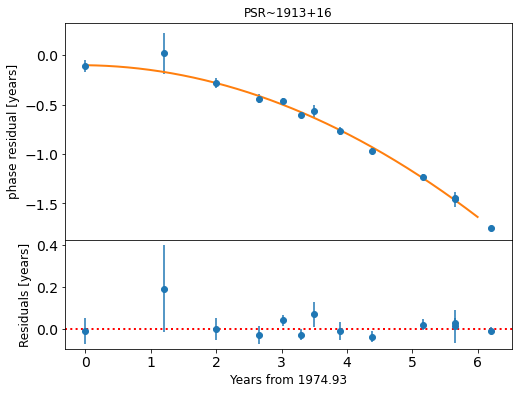

In [18]:
p0=[-1]
parameters_1=fiting(fun_1,pulsar,p0)
p0=[-1,-1]
parameters_2=fiting(fun_2,pulsar,p0)
p0=[-1,-1,-1]
parameters_3=fiting(fun_3,pulsar,p0)

The best fitting is accomplished for the case of quandratic function with the formula:
$y \simeq (-0.1027 \pm 0.0554)+(-0.0074 \pm 0.0278) \cdot x + (-0.0414 \pm 0.0033) \cdot x^{2}$

The orbit phase residuals are inversely proportional orbit period and so from the above plots the period of the pulsar's binary is constantly increasing and there is a parabolic change in the residual with time. A constantly increasing period (a quadratically decreasing phase residual) is what we would expect if gravitational waves are radiating energy from the system.
Regarding the goodness of fit we can see that the p values for a constant or a linear function is almost zero and so they lead to very bad fit.The repsected value for the quandratic function is 0.4, indicating that the data are consistent with being normally distributed around the model and the fit is good.

### Exercise 2: 

Below I use the same rebin function as the one in lectures for n>20 in each bin:

In [19]:
def histrebin(mininbin,counts,edges):
    edges2=np.zeros(1)
    counts2=np.zeros(1)
    i=0
    countsum=0
    firstbin_flag = 1
    edges2[0]=edges[0]
    for x in counts:
        countsum=countsum+x
        i=i+1
        if countsum >= mininbin and (sum(counts[i:]) >= mininbin or i == len(counts)):  
            if firstbin_flag == 1: 
                counts2[0]=countsum
                firstbin_flag = 0
            else:
                counts2=np.append(counts2,countsum)
            edges2=np.append(edges2,edges[i])
            countsum=0        
    return counts2, edges2

Below I plot the initial histogram of bins that follows poisson distribution and the one that is properly rebbined and each bin has n>20 and so follows a normal distribution:

Text(0.5, 1.0, 'Rebinned samples:Normal log-likelihood')

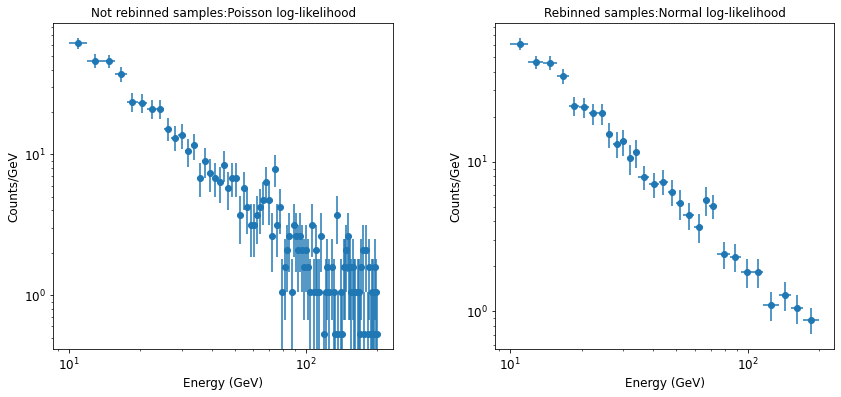

In [20]:
energy_detection=np.loadtxt('photon_energies.txt')

nbins = 100
counts, edges = np.histogram(energy_detection, bins=nbins, range=[10., 200.], density=False)
energy = (edges[:-1]+edges[1:])/2.
bwidths = np.diff(edges)
y_values=counts/bwidths
y_error=np.sqrt(counts)/bwidths

mincounts = 20  
counts_reb, edges_reb = histrebin(mincounts,counts,edges)
energy_reb = (edges_reb[:-1]+edges_reb[1:])/2.
bwidths_reb = np.diff(edges_reb)
y_values_reb = counts_reb/bwidths_reb
y_error_reb = np.sqrt(counts_reb)/bwidths_reb

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1.errorbar(energy, y_values, xerr=bwidths/2., yerr=y_error, fmt='o')
ax2.errorbar(energy_reb, y_values_reb, xerr=bwidths_reb/2., yerr=y_error_reb, fmt='o')
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel("Counts/GeV", fontsize=12)
    ax.set_xlabel("Energy (GeV)", fontsize=12)

ax1.set_title("Not rebinned samples:Poisson log-likelihood")
ax2.set_title("Rebinned samples:Normal log-likelihood")

Below I define a power law model for the above data and a poisson log-likelihood integration function:

In [21]:
def pl_model(x, *parm):
    pl_norm = parm[0]
    pl_index = parm[1]
    return pl_norm * x**pl_index

def LogLikelihood_Pois_Integ(parm, model, ebins, counts): 
    i = 0
    ymod = np.zeros(len(counts))
    for energy in ebins[:-1]:
        ymod[i], ymoderr = spint.quad(lambda x: model(x, *parm),ebins[i],ebins[i+1])
        i=i+1        
    pd = sps.poisson(ymod)
    return -sum(pd.logpmf(counts))

N0 =2638.05117589402 +/- 285.0093159304731
a =-1.5646050302994328 +/- 0.030938858076503598
1, 2, 3-sigma contours correspond to delta-chisq = 2.295748928898636 6.180074306244174 11.82915808190081
[117.  88.  87.  71.  45.  44.  40.  40.  29.  25.  26.  20.  22.  13.
  17.  14.  13.  12.  16.  11.  13.  13.   7.  11.   8.   6.   6.   7.
   8.   9.  12.   9.   5.  15.   6.   8.   2.   3.   4.   5.   2.   6.
   5.   4.   5.   4.   3.   4.   3.   2.   6.   2.   4.   2.   2.   5.
   0.   1.   2.   3.   2.   0.   3.   2.   1.   7.   1.   0.   2.   1.
   3.   3.   4.   5.   3.   3.   2.   3.   2.   2.   0.   2.   2.   1.
   3.   0.   4.   1.   4.   0.   1.   3.   0.   1.   2.   2.   1.   3.
   2.   1.]
[61.57894737 46.31578947 45.78947368 37.36842105 23.68421053 23.15789474
 21.05263158 21.05263158 15.26315789 13.15789474 13.68421053 10.52631579
 11.57894737  6.84210526  8.94736842  7.36842105  6.84210526  6.31578947
  8.42105263  5.78947368  6.84210526  6.84210526  3.68421053  5.78947368
  4

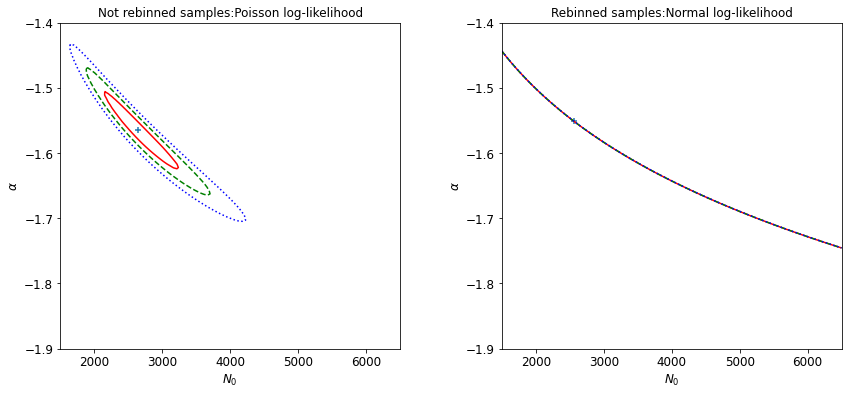

In [22]:
def grid2d_chisqmin(ab_range,ab_steps,model,xval,yval,dy,likel="Normal"):
    dy[dy<0.01]=0.1
    a_grid = np.linspace(ab_range[0][0],ab_range[0][1],ab_steps[0])
    b_grid = np.linspace(ab_range[1][0],ab_range[1][1],ab_steps[1])
    chisq_grid = np.zeros((len(a_grid),len(b_grid)))
    parm=[2600,-1.5]
    if likel=="Normal":
        ml_cfpars, ml_cfcovar = spopt.curve_fit(model, xval, yval, parm, sigma=dy)    
        ab_best = [ml_cfpars[0], ml_cfpars[1]]
        err = np.sqrt(np.diag(ml_cfcovar))
    elif likel=="Poisson":
        result = spopt.minimize(LogLikelihood_Pois_Integ, parm, args=(model, xval, yval), method='BFGS')
        err = np.sqrt(np.diag(result.hess_inv))
        ab_best = [result.x[0], result.x[1]]
        bwidths = np.diff(xval)
        dy=dy/bwidths
        print(yval)
        yval=yval/bwidths
        print(yval)
        xval = (xval[:-1]+xval[1:])/2.
    
    minchisq = np.sum(((yval-model(xval,*ab_best))/dy)**2)
    for i, a_val in enumerate(a_grid):
        for j, b_val in enumerate(b_grid):
            par=[a_val,b_val]
            chisq_grid[i,j] = np.sum(((yval-model(xval,*par))/dy)**2)

    del1 = sps.chi2.isf(2*sps.norm.sf(1),df=2)
    del2 = sps.chi2.isf(2*sps.norm.sf(2),df=2)
    del3 = sps.chi2.isf(2*sps.norm.sf(3),df=2)
    print("N0 =" + str(ab_best[0]) + " +/- " + str(err[0]))
    print("a =" + str(ab_best[1]) + " +/- " + str(err[1]))
    print("1, 2, 3-sigma contours correspond to delta-chisq =",del1,del2,del3)
    X, Y = np.meshgrid(a_grid,b_grid,indexing='ij')
    Z = chisq_grid
    #levels = [minchisq+del1, minchisq+del2, minchisq+del3] 
    if likel=="Normal":
        levels = [minchisq+del1, minchisq+del2, minchisq+del3]
    else:
        levels = [minchisq+del1/2, minchisq+del2/2, minchisq+del3/2]
    
    return X, Y, Z, levels ,ab_best



par_ranges = [[1500.,6500.],[-1.4,-1.9]]
#par_ranges = [[1500.,4500.],[-1.4,-1.8]]
par_steps = [100,100]
X_reb, Y_reb, Z_reb, levels_reb,ab_best_reb=grid2d_chisqmin(par_ranges,par_steps,
                                                            pl_model,energy_reb,y_values_reb,y_error_reb)
#par_ranges = [[2000.,6500.],[-1.5,-1.9]]
X, Y, Z, levels,ab_best=grid2d_chisqmin(par_ranges,par_steps,pl_model,edges,y_values*bwidths,y_error*bwidths,likel="Poisson")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
fig.subplots_adjust(wspace=0.3)
ax1.contour(X_reb, Y_reb, Z_reb, levels_reb, colors=('r', 'g', 'b'), linestyles=('solid','dashed','dotted'))
ax1.scatter(*ab_best_reb, marker="+")
ax2.contour(X, Y, Z, levels, colors=('r', 'g', 'b'), linestyles=('solid','dashed','dotted'))
ax2.scatter(*ab_best, marker="+")
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(r'$\alpha$', fontsize=12)
    ax.set_xlabel(r'$N_{0}$', fontsize=12)

ax1.set_title("Not rebinned samples:Poisson log-likelihood")
ax2.set_title("Rebinned samples:Normal log-likelihood")
plt.show()




## Exercise 3: 

### 1) 
Below the event spectrum is presented and a model for the continuum-only component is defined (background).

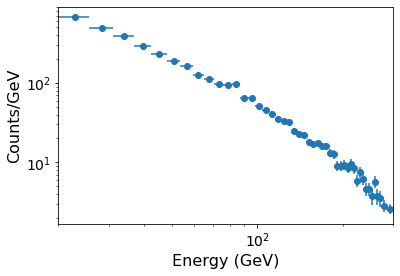

In [23]:
events_energy=np.loadtxt('event_energies.txt')
counts, edges = np.histogram(events_energy, bins=50, range=[20., 300.], density=False)
mincounts = 20
counts2, edges2 = histrebin(mincounts,counts,edges)
bwidths = np.diff(edges2)
cdens = counts2/bwidths
cdens_err = np.sqrt(counts2)/bwidths
energies = (edges2[:-1]+edges2[1:])/2.
plt.figure()
plt.errorbar(energies, cdens, xerr=bwidths/2., yerr=cdens_err, fmt='o')
plt.xlabel("Energy (GeV)", fontsize=16)
plt.ylabel("Counts/GeV", fontsize=16)
plt.tick_params(labelsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlim(20.0,300.0)
plt.show() 

#Background model:
def pl_model_2(x, *parm):
    return parm[0] *(x**(parm[1]))*np.exp(-x/parm[2])

Below a fitting function is presented similar to the one in the lectures material based on the normal distribution of the events in the bins,with another function for the fitted line and data aith also data/model:

In [24]:
def fiting_2(function,energies, cdens,cdens_err,*p0,m):
    ml_cfpars, ml_cfcovar = spopt.curve_fit(function,energies,cdens,*p0,sigma=cdens_err)
    err = np.sqrt(np.diag(ml_cfcovar))
    if m==0:
        print(" N_background=",ml_cfpars[0]," +/- ",err[0],", \n gamma=",ml_cfpars[1],
              " +/-",err[1],",\n E_cut=",ml_cfpars[2],"+/- ",err[2]," GeV")
    elif m==1:
        print(" N_background=",ml_cfpars[0]," +/- ",err[0],", \n gamma=",ml_cfpars[1],
              " +/-",err[1],",\n E_cut=",-ml_cfpars[2],"+/- ",err[2]," GeV")
        
        print(" Gauss:N=",ml_cfpars[3]," +/- ",err[3],",\n mean=",ml_cfpars[5]," +/- ",ml_cfpars[4]," GeV")
    else:
        print("Wrong m value")
    minchisq = np.sum(((cdens-function(energies,*ml_cfpars))/cdens_err)**2)
    dof = len(cdens)-len(p0)
    print(" Minimum Chi-squared = "+str(minchisq)+" for "+str(dof)+" d.o.f.")
    print(" The goodness of fit is: ",sps.chi2.sf(minchisq,df=dof))
    return ml_cfpars


def fiting(function,energies, cdens,cdens_err,p0,m,bwidths=bwidths):
    ml_cfpars=fiting_2(function,energies, cdens,cdens_err,p0,m=m)
    

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.errorbar(energies-bwidths/2, cdens, xerr=bwidths/2., yerr=cdens_err, marker="o", linestyle="")
    ax1.step(energies,function(energies,*ml_cfpars))
    ax1.set_yscale('log')
    ax1.set_xscale('log')    
    ax1.set_title("Event spectrum")
    ax1.set_ylabel("Counts/GeV", fontsize=12)
    ax1.tick_params(labelsize=14)
    ax2.errorbar(energies,cdens/function(energies,*ml_cfpars),xerr=bwidths/2,
                 yerr=cdens_err/function(energies,*ml_cfpars),marker="o", linestyle="")
    ax2.set_xlabel("Energy (GeV)",fontsize=12)
    ax2.set_ylabel("data/model ", fontsize=12)
    ax2.axhline(1.0, color='r', linestyle='dotted', lw=2) 
    ax2.tick_params(labelsize=14)
    plt.show()

    return

 N_background= 41824.162304564554  +/-  5100.4086200434995 , 
 gamma= -1.2562186521171297  +/- 0.03890296833035903 ,
 E_cut= 114.66721914901976 +/-  6.863079367482982  GeV
 Minimum Chi-squared = 64.15121030104187 for 46 d.o.f.
 The goodness of fit is:  0.039528160557398946


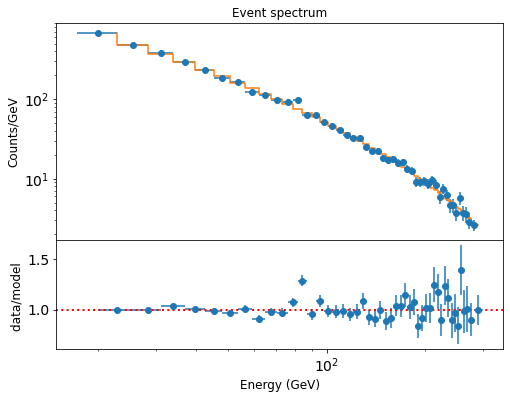

In [25]:
p0=[1000,1,80]
fiting(pl_model_2,energies, cdens,cdens_err,p0,m=0)

In the above plot is visible a possible gaussian component at 80-85 GeV,while the goodness of fit values are very low to be considered a good fit.

### 2) 

Below the extended model is defined which is the compination of the continum model with a gaussian component(3 extra parameter):

In [26]:
def pl_model_3(x, *parm):
    initial_model=parm[0] *(x**(parm[1]))*np.exp(x/parm[2])
    Gauss=(1/(parm[4]*np.sqrt(2*np.pi)))*np.exp(-(x-parm[5])**2/(2*parm[4]**2))
    return initial_model+parm[3]*Gauss

 N_background= 46962.70849374153  +/-  4433.408837783613 , 
 gamma= -1.2942576653835955  +/- 0.030204633795651668 ,
 E_cut= 120.2180967220046 +/-  5.741665929639237  GeV
 Gauss:N= 397.6862175864241  +/-  38735591.29727322 ,
 mean= 81.95699530413265  +/-  1.3562182818182398  GeV
 Minimum Chi-squared = 32.60637884231627 for 46 d.o.f.
 The goodness of fit is:  0.9318229768627058


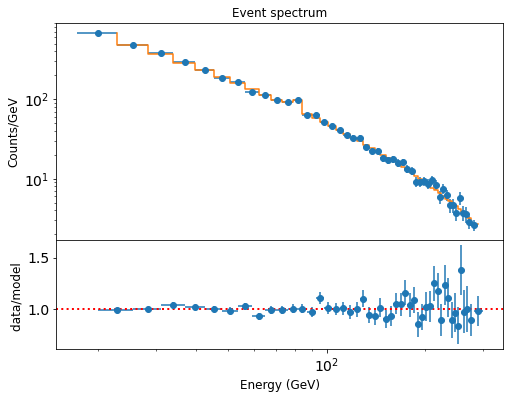

In [27]:
p0=[4000.,-1.25,114.,2000, 20.,81.0]
parameters=fiting(pl_model_3,energies, cdens,cdens_err,p0,m=1)


The energy of the particle from the above fitting is 81.957 +/- 1.356 GeV

Since the line energy is not really a ‘nestable’ model parameter because the likelihood does not smoothly change for simplicity we consider only the flux as the additional constraint.
We can see that the initial $\chi^{2}$ value without the gaussian extention is 64.15,while for the gaussian extention the $\chi^{2}$ is 32.6 and so $\Delta \chi^{2}_{1}$ = 31.55.This is an important difference ando the improvementt is expected to be high,which is also can be observed by the big increasment of the goodness of fit from 0.0395 to 0.9318.

In [28]:
p=sps.chi2.sf(64.15-32.6,df=1)
print("p-value for our delta-chi-squared: ",p)
print("Bonferroni correction =",sps.binom.pmf(0,n=20, p=p))

p-value for our delta-chi-squared:  1.9437037654311097e-08
Bonferroni correction = 0.9999996112593187


So from the above p value by Wilks’ theorem we conclude that the apparent emission feature at ~81 GeV is significant by the extremely low value of p and also the very high Bonferroni correction that indictate that the calculated p value is not a result of chance.

### 3) 

Below the same functions as in the lectures material for the calculation $\chi^{2}$ of a free parameter for a multiparameter model:

In [29]:
def model_int_cf(ecent, ebins, model, *parm):
    '''General function for integrating the input model over energy bins ebins within curve_fit.
       Inputs:
           ecent - energy bin centres, dummy array with length len(ebins)-1 to fool curve_fit into 
                   accepting the function as the correct format for curve_fit.
           ebins - energy bin edges.
           model, parm - the curve_fit model name and input parameter list.
       Outputs:
           ymod - calculated counts-density model values for y-axis.'''
    i = 0
    ymod = np.zeros(len(ecent))
    for energy in ebins[:-1]:
        ymod[i], ymoderr = spint.quad(lambda x: model(x, parm),ebins[i],ebins[i+1])
        ymod[i] = ymod[i]/(ebins[i+1]-ebins[i]) 
        i=i+1
    return ymod



def grid1d_chisqmin_cfint(a_index,a_range,a_steps,parm,model,xval,yval,dy,xedges):
    '''Finds best the fit and then carries out chisq minimisation for a 1D grid of fixed parameters.
       Input: 
            a_index - index of 'a' parameter (in input list parm) to use for grid.
            a_range, a_steps - range (tuple or list) and number of steps for grid.
            parm - parameter list for model to be fitted.
            model - name of model function to be fitted.
            xval, dyval, dy - data x, y and y-error arrays
        Output: 
            a_best - best-fitting value for 'a'
            minchisq - minimum chi-squared (for a_best)
            a_grid - grid of 'a' values used to obtain fits
            chisq_grid - grid of chi-squared values corresponding to a_grid'''
    a_grid = np.linspace(a_range[0],a_range[1],a_steps)
    chisq_grid = np.zeros(len(a_grid))
    ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda xval, *parm: model_int_cf(xval, xedges, 
                            model, parm), xval, yval, parm, sigma=dy)
    
    minchisq = np.sum(((yval-model_int_cf(xval,xedges,model,*ml_cfpars))/dy)**2)
    a_best = ml_cfpars[a_index]
    free_parm = np.delete(parm,a_index)
    for i, a_val in enumerate(a_grid):        
        ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda xval, *parm: model_int_cf(xval, xedges, 
                            model, parm), xval, yval, parm, sigma=dy)        

        chisq_grid[i] = np.sum(((yval-model_int_cf(xval,xedges,model,
                                                   *np.insert(ml_cfpars,a_index,a_val)))/dy)**2)

        print(i+1,'steps: chisq =',chisq_grid[i],'for line flux =',a_val,' minimum = ',minchisq,
              ' for line flux =',a_best)
        
    
    return a_best, minchisq, a_grid, chisq_grid  
    
def calc_upper_chisq(delchisq,minchisq,a_grid,chisq_grid):
    '''Function to return upper values of a parameter 'a' for a given delta-chi-squared
       Input:
           delchisq - the delta-chi-squared for the confidence interval required (e.g. 1 for 1-sigma error)
           a_grid, chisq_grid - grid of 'a' and corresponding chi-squared values used for interpolation'''

    chisq_interp_upper = spinterp.interp1d(chisq_grid,a_grid)
    a_upper = chisq_interp_upper(minchisq+delchisq)
    return a_upper

def pl_model_3(x, parm):
    initial_model=parm[0] *(x**(parm[1]))*np.exp(x/parm[2])
    Gauss=(1/(parm[4]*np.sqrt(2*np.pi)))*np.exp(-(x-parm[5])**2/(2*parm[4]**2))
    return initial_model+parm[3]*Gauss

1 steps: chisq = 64.89150363092175 for line flux = 0.0  minimum =  61.271365891931545  for line flux = -52.83910394738592
2 steps: chisq = 64.70919425312593 for line flux = 6.410256410256411  minimum =  61.271365891931545  for line flux = -52.83910394738592
3 steps: chisq = 64.54931086171628 for line flux = 12.820512820512821  minimum =  61.271365891931545  for line flux = -52.83910394738592
4 steps: chisq = 64.41185345669304 for line flux = 19.230769230769234  minimum =  61.271365891931545  for line flux = -52.83910394738592
5 steps: chisq = 64.29682203805609 for line flux = 25.641025641025642  minimum =  61.271365891931545  for line flux = -52.83910394738592
6 steps: chisq = 64.20421660580551 for line flux = 32.05128205128205  minimum =  61.271365891931545  for line flux = -52.83910394738592
7 steps: chisq = 64.13403715994126 for line flux = 38.46153846153847  minimum =  61.271365891931545  for line flux = -52.83910394738592
8 steps: chisq = 64.08628370046331 for line flux = 44.87179

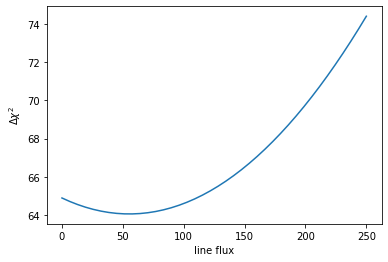

In [30]:
# Energy value from Prof. Petra Biggs assumption:
fixed_en = 144.0
#The above value is the only frozer parameter while the N Gauss is the free parameter below:

new_model = lambda x, parm: pl_model_3(x,np.insert(parm,5,fixed_en))
parm = [46960, -1.5, -120.0,0.0,15.]
a_index = 3
par_range = [0.,250.]
n_steps = 40
a_best, minchisq, a_grid, chisq_grid = grid1d_chisqmin_cfint(a_index,par_range,n_steps,parm,new_model,
                             energies,cdens,cdens_err,edges2)

delchisq = 9
a_upper = calc_upper_chisq(delchisq,minchisq,a_grid,chisq_grid)
print("3-sigma upper limit on line flux: ", a_upper)
plt.plot(a_grid,chisq_grid)
plt.xlabel("line flux")
plt.ylabel("$\Delta \chi^{2}$")
plt.show()